In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Data Preparation

## Load Dataset & Initial Inspection

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Cleaning

In [5]:
print("Missing Values:\n", df.isnull().sum())
print("\nJumlah Duplikasi:", df.duplicated().sum())

# Jika ada duplikasi → hapus
df.drop_duplicates(inplace=True)

Missing Values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Jumlah Duplikasi: 0


## Validation

In [6]:
# Deteksi nilai medis yang tidak masuk akal
print("RestingBP == 0 :", df[df['RestingBP'] == 0].shape[0])
print("Cholesterol == 0 :", df[df['Cholesterol'] == 0].shape[0])

RestingBP == 0 : 1
Cholesterol == 0 : 172


In [7]:
# Perbaiki nilai anomali -> ganti median sesuai domain klinis
df.loc[df['RestingBP'] == 0, 'RestingBP'] = df['RestingBP'].median()
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = df['Cholesterol'].median()

# Exploratory Data Analysis (EDA)

In [8]:
print("Shape:", df.shape)

Shape: (918, 12)


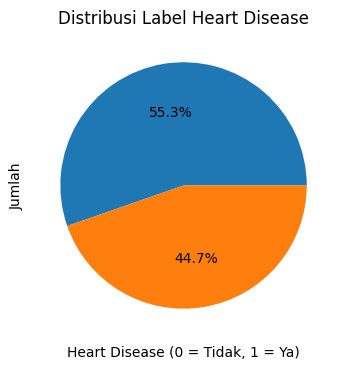

In [9]:
# Distribusi Target (Heart Disease)
plt.figure(figsize=(6,4))
plt.pie(x=df['HeartDisease'].value_counts(), autopct="%0.1f%%")
plt.title("Distribusi Label Heart Disease")
plt.xlabel("Heart Disease (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah")
plt.show()

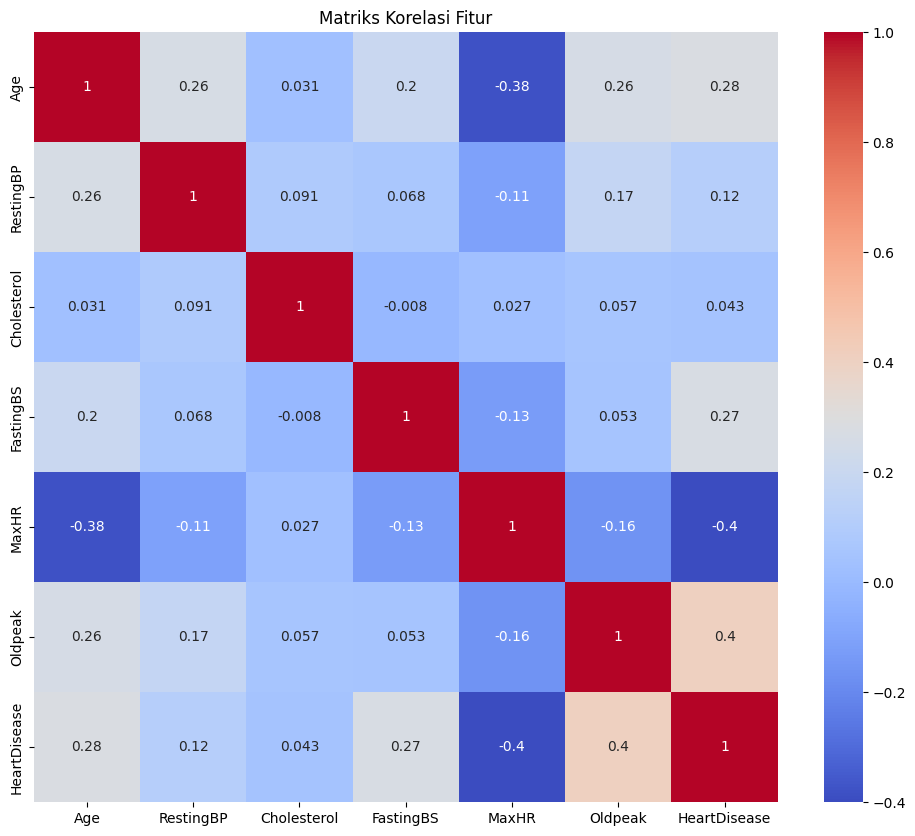

In [12]:
# Korelasi antar fitur numerik
plt.figure(figsize=(12,10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Fitur")
plt.show()

# Data Visualization

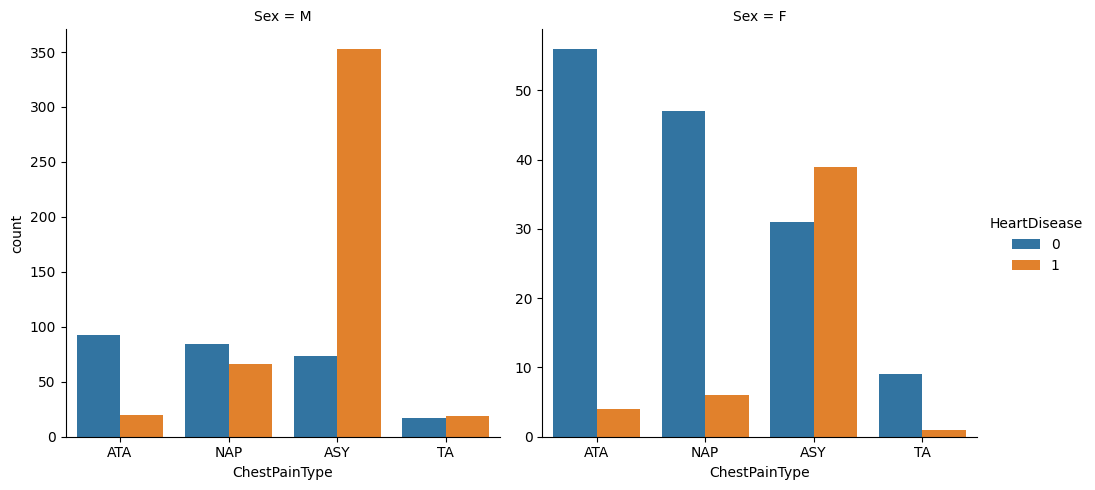

In [ ]:
# Visualisasi 1 - ChestPainType vs HeartDisease
sns.catplot(df, x="ChestPainType", hue="HeartDisease", kind="count", col="Sex", sharey=False)

plt.show()

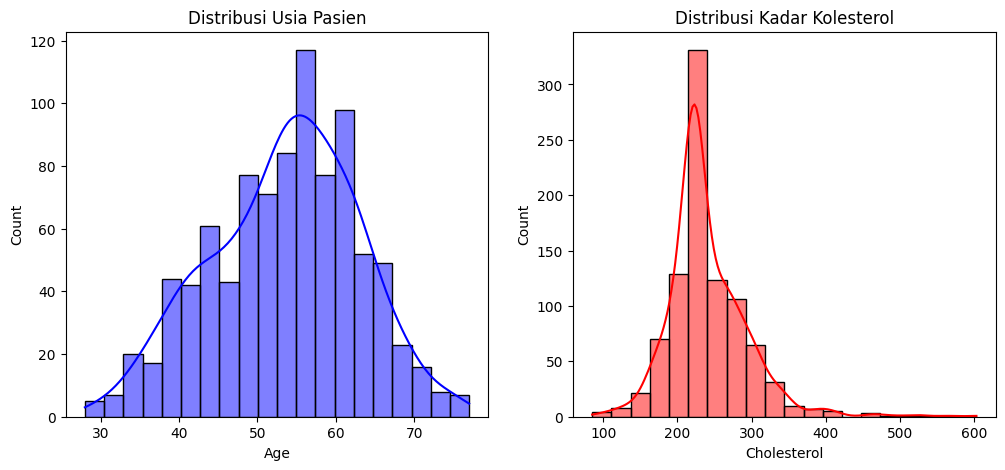

In [ ]:
# Visualisasi 2 - Distribusi Age dan Cholesterol
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title("Distribusi Usia Pasien")

plt.subplot(1,2,2)
sns.histplot(df['Cholesterol'], kde=True, bins=20, color='red')
plt.title("Distribusi Kadar Kolesterol")
plt.show()

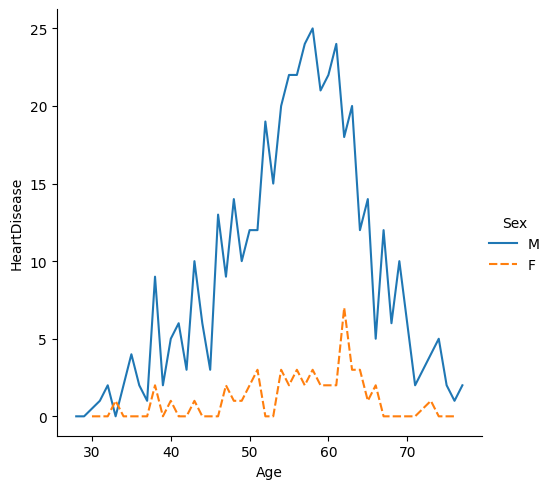

In [27]:
# Visualisasi 3 - 

grouped_df = df.groupby(['Age', 'Sex'], as_index=False)['HeartDisease'].sum()
sns.relplot(
    data=grouped_df,
    x="Age", y="HeartDisease", hue="Sex", style="Sex", kind="line"
)
plt.show()

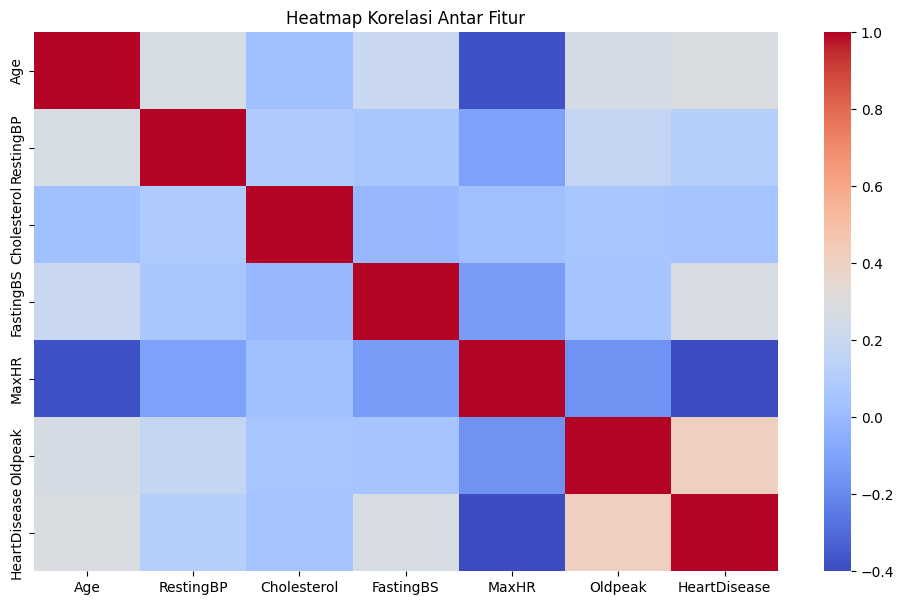

In [28]:
# Visualisasi 4 - Semua Fitur Numerik
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

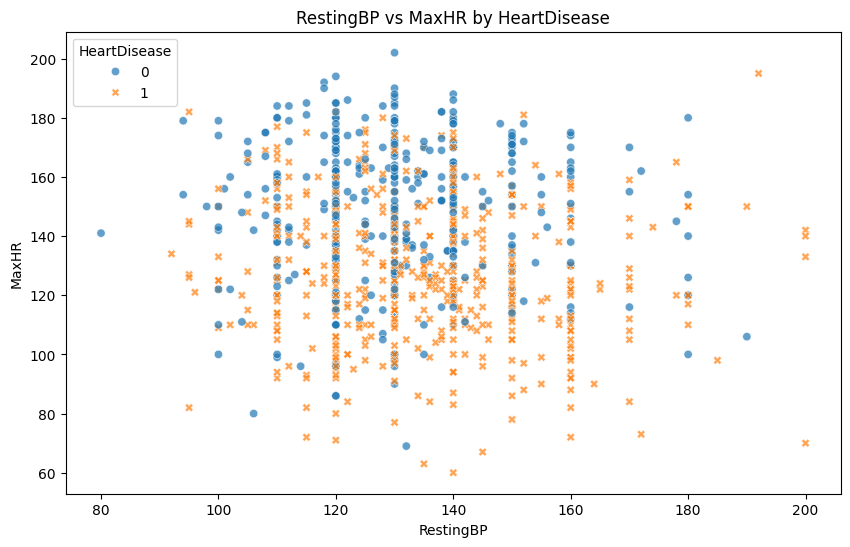

In [33]:
# Visualisasi 5 - RestingBP vs MaxHR dengan HeartDisease sebagai hue
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='RestingBP',
    y='MaxHR',
    hue='HeartDisease',
    style='HeartDisease',
    # palette='coolwarm',
    alpha=0.7
)
plt.title("RestingBP vs MaxHR by HeartDisease")
plt.show()

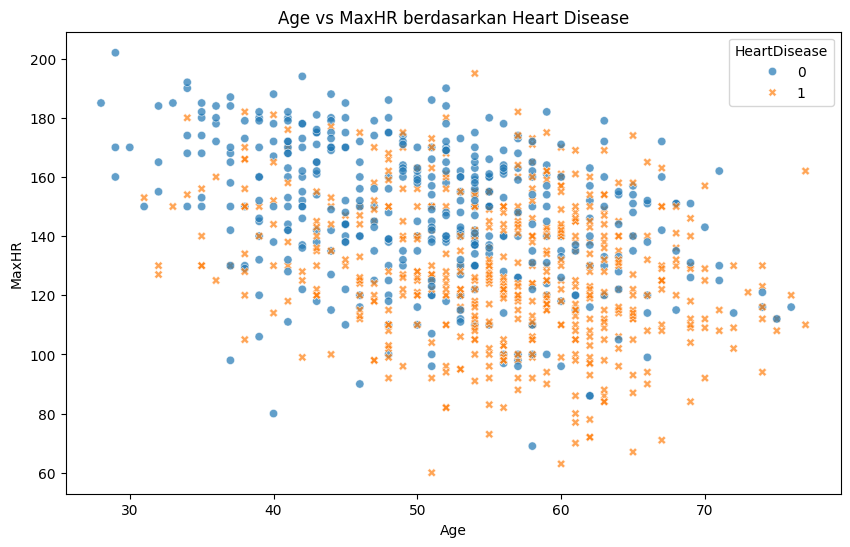

In [36]:
# Visual 6 - Hubungan Age vs MaxHR Based on Target Label
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease', alpha=0.7, style='HeartDisease',)
plt.title("Age vs MaxHR berdasarkan Heart Disease")
plt.show()